In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=16)

In [ ]:
#1

# 1
Ошибка $f$ складывается из ошибки аппроксимации и ошибки вычисления:
$f = \dfrac{M_{3} (N \tau)^{2}}{6} + \dfrac{\Delta p}{N \tau} \\$
Найдем экстремум $f$:
$\dfrac{df}{dN} = 0$ $\newline$
$\dfrac{M_{3} \tau^{2}}{3} N - \dfrac{\Delta p}{N^{2} \tau} = 0$ $\newline$
$N = (\dfrac{3 \Delta p}{M_{3}})^{1/3} \dfrac{1}{\tau} = (\dfrac{3 \ 0.3 \ 1000^{3}}{3! 200 })^{1/3} \dfrac{1}{1} \approx 91 $

In [19]:
def diff182(t, p):
    return (p[182:] - p[:-182]) / (t[182:] - t[:-182])
def diff300(t, p):
    return (p[300:] - p[:-300]) / (t[300:] - t[:-300])

In [14]:
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

# Истинное значение производной - для сравнения
pprime = -p0 / t0 / (1 + t / t0)**2;

In [15]:
def diff2(t, p):
    # Разность через одну точку удобнее считать с помощью операций с частями массива 
    return (p[2:] - p[:-2]) / (t[2:] - t[:-2])

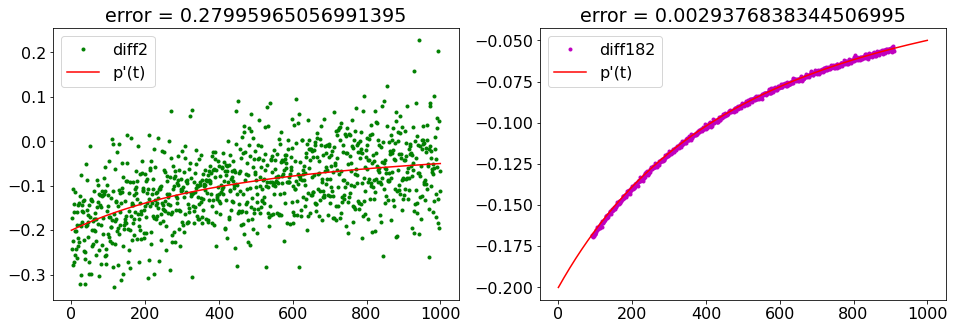

In [17]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[1:-1], diff2(t, p), 'g.', label="diff2")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff2(t, p) - pprime[1:-1]).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[91:-91], diff182(t, p), 'm.', label="diff182")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff182(t, p) - pprime[91:-91]).max()))
plt.legend(loc='best')

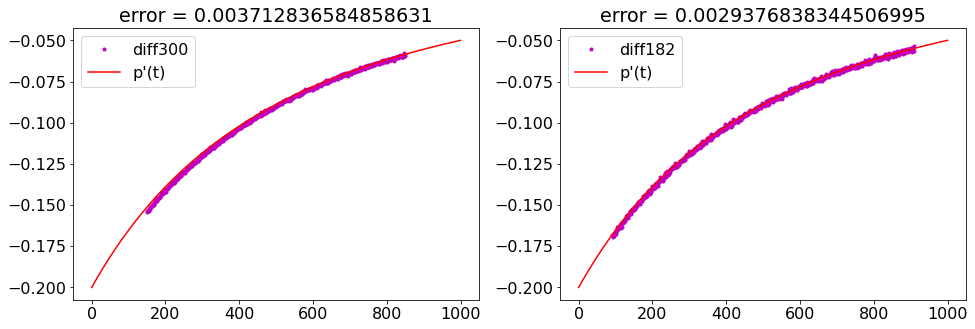

In [22]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 2)
plt.plot(t[91:-91], diff182(t, p), 'm.', label="diff182")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff182(t, p) - pprime[91:-91]).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 1)
plt.plot(t[150:-150], diff300(t, p), 'm.', label="diff300")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff300(t, p) - pprime[150:-150]).max()))
plt.legend(loc='best')

Для примера, я также построил график для более удаленных точек (300), откуда мы видим, что $N = 91$ является оптимальным "расстоянием".